Final Project 3 - Ensemble

Anggota Kelompok:
* Rizqi Meidianto Kresna M - PYTN-KS09-010
* Naufal Afif S - PYTN-KS09-015
* Berlian Safri Prakoso - PYTN-KS09-016


## Latar Belakang

**Dataset**

Dataset yang digunakan dalam pembuatan model bersumber dari https://www.kaggle.com/datasets/andrewmvd/heart-failure-clinical-data

Dataset ini berisikan 13 feature perilaku dari 299 pasien.

**Objective yang ingin dicapai**

* Melakukan klasifikasi kematian pasien akibat gagal jantung
* Mengetahui akurasi yang optimal untuk memprediksi kemungkinan kematian pasien akibat gagal jantung

## Import Libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import normalize, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn import tree
from sklearn.metrics import accuracy_score, confusion_matrix, mean_squared_error

import pickle

## Data Loading

In [2]:
df = pd.read_csv('dataset/heart_failure_clinical_records_dataset.csv')
df.head()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 299 entries, 0 to 298
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   age                       299 non-null    float64
 1   anaemia                   299 non-null    int64  
 2   creatinine_phosphokinase  299 non-null    int64  
 3   diabetes                  299 non-null    int64  
 4   ejection_fraction         299 non-null    int64  
 5   high_blood_pressure       299 non-null    int64  
 6   platelets                 299 non-null    float64
 7   serum_creatinine          299 non-null    float64
 8   serum_sodium              299 non-null    int64  
 9   sex                       299 non-null    int64  
 10  smoking                   299 non-null    int64  
 11  time                      299 non-null    int64  
 12  DEATH_EVENT               299 non-null    int64  
dtypes: float64(3), int64(10)
memory usage: 30.5 KB


Dataset memiliki tipe data float dan int. Selain itu, tidak terdapat missing value disetiap featurenya.

In [4]:
df.isnull().sum()

age                         0
anaemia                     0
creatinine_phosphokinase    0
diabetes                    0
ejection_fraction           0
high_blood_pressure         0
platelets                   0
serum_creatinine            0
serum_sodium                0
sex                         0
smoking                     0
time                        0
DEATH_EVENT                 0
dtype: int64

In [5]:
df.columns

Index(['age', 'anaemia', 'creatinine_phosphokinase', 'diabetes',
       'ejection_fraction', 'high_blood_pressure', 'platelets',
       'serum_creatinine', 'serum_sodium', 'sex', 'smoking', 'time',
       'DEATH_EVENT'],
      dtype='object')

In [6]:
for col in df.columns:
    print(col, ':', df[col].nunique())

age : 47
anaemia : 2
creatinine_phosphokinase : 208
diabetes : 2
ejection_fraction : 17
high_blood_pressure : 2
platelets : 176
serum_creatinine : 40
serum_sodium : 27
sex : 2
smoking : 2
time : 148
DEATH_EVENT : 2


## Data Cleaning

In [7]:
# Mengubah data type pada feature 'age' dan 'platelets'
df['age'] = df['age'].astype(int)
df['platelets'] = df['platelets'].astype(int)

In [8]:
# Menghapus feature 'serum_creatinine'
df = df.drop(['serum_creatinine'], axis=1, inplace=False)

In [9]:
df.duplicated().sum()

0

## Data Exploration

In [10]:
df.describe()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_sodium,sex,smoking,time,DEATH_EVENT
count,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.00000,299.000000,299.00000
mean,60.829431,0.431438,581.839465,0.418060,38.083612,0.351171,263358.026756,136.625418,0.648829,0.32107,130.260870,0.32107
std,11.894997,0.496107,970.287881,0.494067,11.834841,0.478136,97804.236869,4.412477,0.478136,0.46767,77.614208,0.46767
min,40.000000,0.000000,23.000000,0.000000,14.000000,0.000000,25100.000000,113.000000,0.000000,0.00000,4.000000,0.00000
25%,51.000000,0.000000,116.500000,0.000000,30.000000,0.000000,212500.000000,134.000000,0.000000,0.00000,73.000000,0.00000
50%,60.000000,0.000000,250.000000,0.000000,38.000000,0.000000,262000.000000,137.000000,1.000000,0.00000,115.000000,0.00000
75%,70.000000,1.000000,582.000000,1.000000,45.000000,1.000000,303500.000000,140.000000,1.000000,1.00000,203.000000,1.00000
max,95.000000,1.000000,7861.000000,1.000000,80.000000,1.000000,850000.000000,148.000000,1.000000,1.00000,285.000000,1.00000


In [11]:
df.corr()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_sodium,sex,smoking,time,DEATH_EVENT
age,1.000000,0.087574,-0.081406,-0.101454,0.060195,0.093170,-0.052475,-0.045912,0.065546,0.018926,-0.224265,0.253581
anaemia,0.087574,1.000000,-0.190741,-0.012729,0.031557,0.038182,-0.043786,0.041882,-0.094769,-0.107290,-0.141414,0.066270
creatinine_phosphokinase,-0.081406,-0.190741,1.000000,-0.009639,-0.044080,-0.070590,0.024463,0.059550,0.079791,0.002421,-0.009346,0.062728
diabetes,-0.101454,-0.012729,-0.009639,1.000000,-0.004850,-0.012732,0.092193,-0.089551,-0.157730,-0.147173,0.033726,-0.001943
ejection_fraction,0.060195,0.031557,-0.044080,-0.004850,1.000000,0.024445,0.072177,0.175902,-0.148386,-0.067315,0.041729,-0.268603
high_blood_pressure,0.093170,0.038182,-0.070590,-0.012732,0.024445,1.000000,0.049963,0.037109,-0.104615,-0.055711,-0.196439,0.079351
platelets,-0.052475,-0.043786,0.024463,0.092193,0.072177,0.049963,1.000000,0.062125,-0.125120,0.028234,0.010514,-0.049139
serum_sodium,-0.045912,0.041882,0.059550,-0.089551,0.175902,0.037109,0.062125,1.000000,-0.027566,0.004813,0.087640,-0.195204
sex,0.065546,-0.094769,0.079791,-0.157730,-0.148386,-0.104615,-0.125120,-0.027566,1.000000,0.445892,-0.015608,-0.004316
smoking,0.018926,-0.107290,0.002421,-0.147173,-0.067315,-0.055711,0.028234,0.004813,0.445892,1.000000,-0.022839,-0.012623


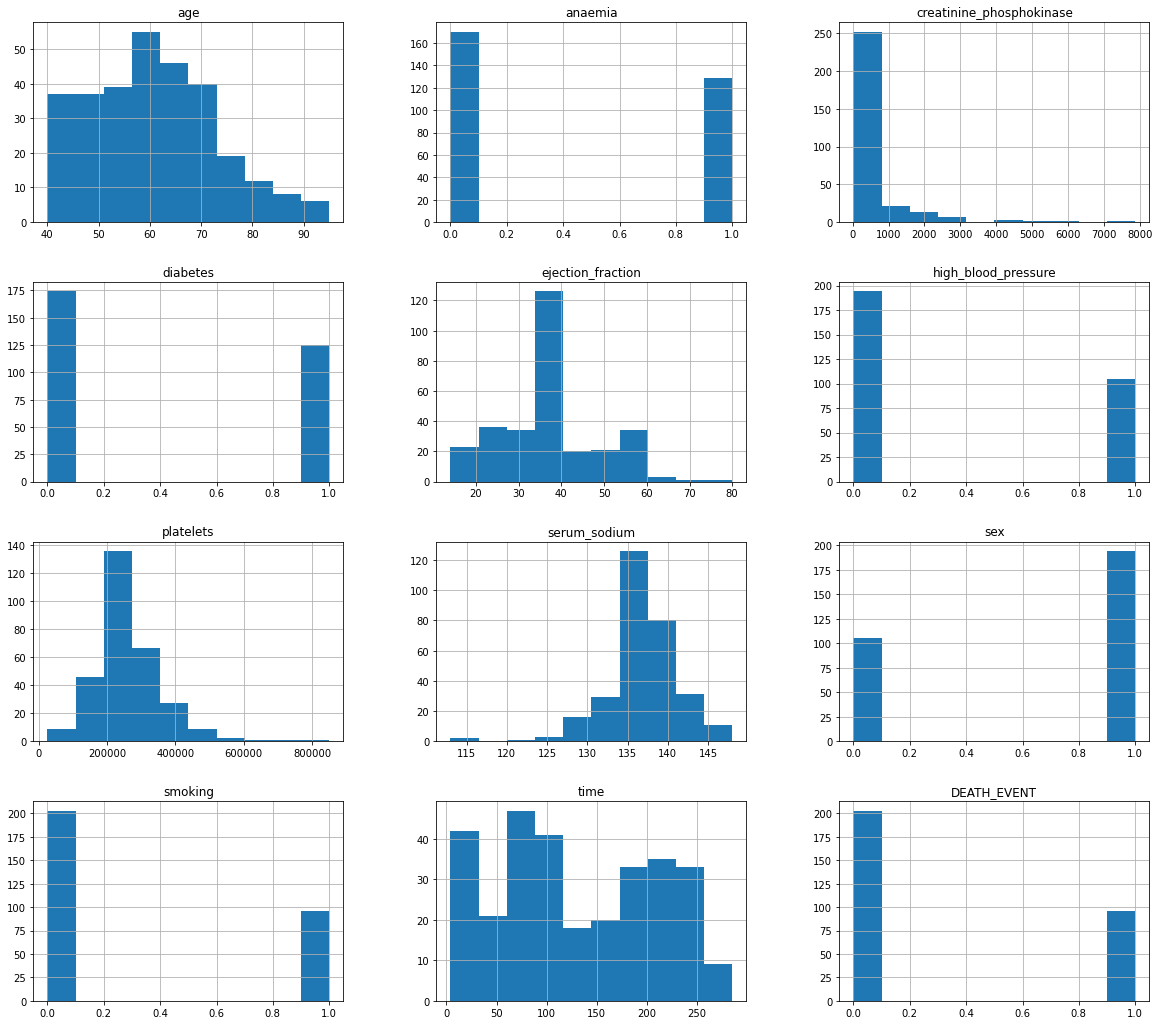

In [12]:
df.hist(bins=10, figsize=(20, 18))
plt.show()

## Data Preprocessing

In [13]:
# Memisahkan feature independent dan dependent
X = df.drop(['DEATH_EVENT'], axis=1)
y = df['DEATH_EVENT']

**Data Scaling**

In [14]:
# Melakukan penskalaan data
sclr = StandardScaler()
sclr_X = sclr.fit_transform(X)

In [15]:
feat_cols = ['age', 'anaemia', 'creatinine_phosphokinase', 'diabetes', 'ejection_fraction', 'high_blood_pressure', 'platelets', 'serum_sodium', 'sex', 'smoking', 'time']
X = pd.DataFrame(sclr_X, columns=feat_cols)
X.head()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_sodium,sex,smoking,time
0,1.193302,-0.871105,0.000166,-0.847579,-1.530560,1.359272,1.681651e-02,-1.504036,0.735688,-0.687682,-1.629502
1,-0.490896,-0.871105,7.514640,-0.847579,-0.007077,-0.735688,-2.740240e-07,-0.141976,0.735688,-0.687682,-1.603691
2,0.351203,-0.871105,-0.449939,-0.847579,-1.530560,-0.735688,-1.038073e+00,-1.731046,0.735688,1.454161,-1.590785
3,-0.911945,1.147968,-0.486071,-0.847579,-1.530560,-0.735688,-5.464741e-01,0.085034,0.735688,-0.687682,-1.590785
4,0.351203,1.147968,-0.435486,1.179830,-1.530560,-0.735688,6.517986e-01,-4.682176,-1.359272,-0.687682,-1.577879


**Data Split**

In [16]:
# Memisahkan data train dan test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

## Model Defining

**Random Forest**

In [17]:
# Menggunakan criterion='entropy' dan n_estimators=80
modelRF = RandomForestClassifier(criterion='entropy', n_estimators=80)

**Boosting**

In [18]:
# Menggunakan n_estimators=80
modelB = GradientBoostingClassifier(n_estimators=80)

## Model Training

**Random Forest**

In [19]:
modelRF.fit(X_train, y_train)

RandomForestClassifier(criterion='entropy', n_estimators=80)

**Boosting**

In [20]:
modelB.fit(X_train, y_train)

GradientBoostingClassifier(n_estimators=80)

## Model Testing

Melakukan test pada model dan melihat tingkat error dari hasil prediksi model

**Random Forest**

In [21]:
predRF = modelRF.predict(X_test)
accurRF = accuracy_score(y_test, predRF)
mseRF = mean_squared_error(predRF, y_test)
rmseRF = np.sqrt(mean_squared_error(predRF, y_test))
matrixRF = confusion_matrix(y_test, predRF)

print(matrixRF)

[[35  2]
 [ 9 14]]


**Boosting**

In [22]:
predB = modelB.predict(X_test)
accurB = accuracy_score(y_test, predB)
mseB = mean_squared_error(predB, y_test)
rmseB = np.sqrt(mean_squared_error(predB, y_test))
matrixB = confusion_matrix(y_test, predB)

print(matrixB)

[[33  4]
 [ 6 17]]


**Visualization**

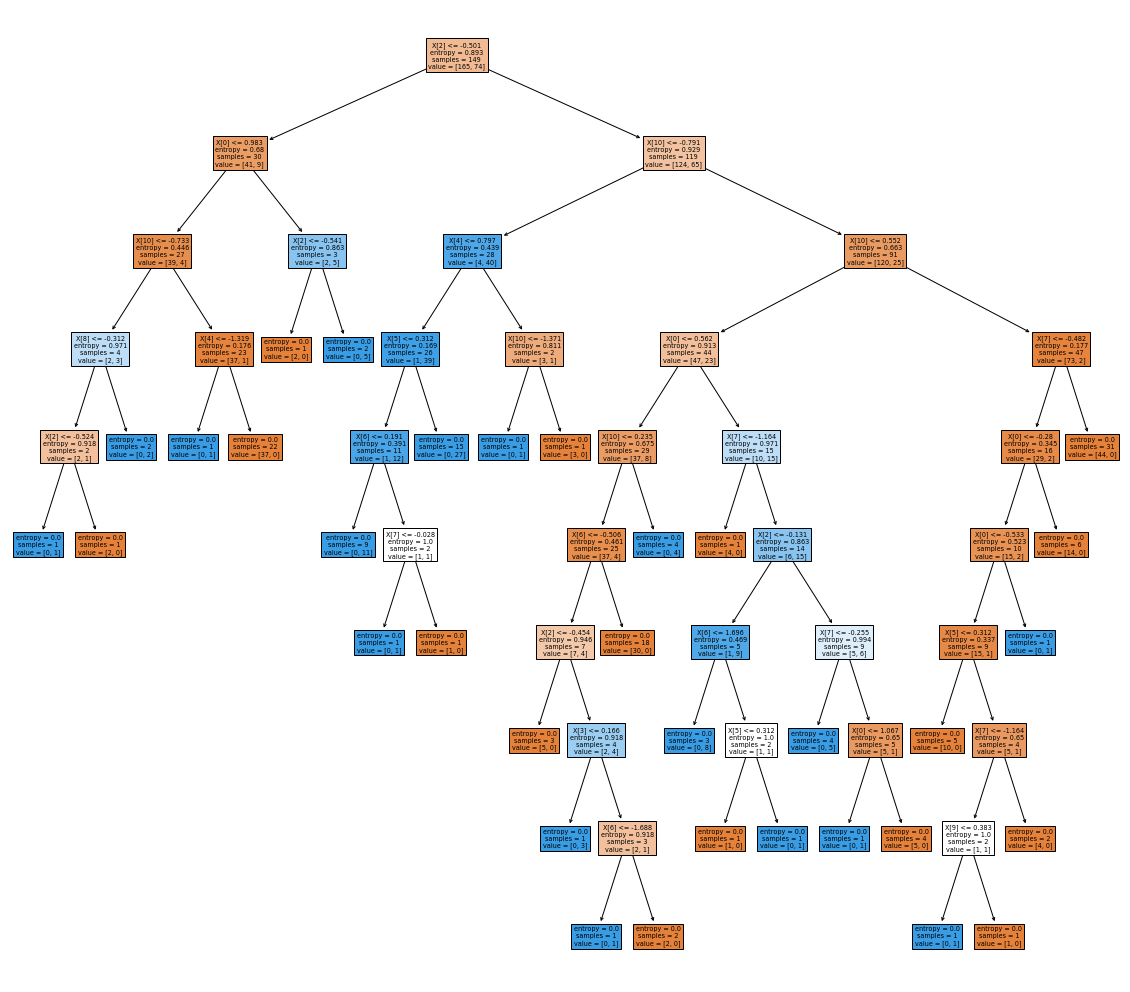

In [23]:
plt.figure(figsize=(20, 18))
# estimators ke-8
for i in range(int(len(modelRF.estimators_) / 10)):
    tree.plot_tree(modelRF.estimators_[i], filled=True)

**Comparison**

Membandingkan akurasi dan tingkat error model

In [24]:
modelSlc = pd.DataFrame(data={'Random Forest': [accurRF, mseRF, rmseRF],
                              'Boosting': [accurB, mseB, rmseB]},
                       index=['Accuracy Score', 'MSE Score', 'RMSE Score'])
modelSlc

,Random Forest,Boosting
Accuracy Score,0.816667,0.833333
MSE Score,0.183333,0.166667
RMSE Score,0.428174,0.408248


## Model Inference

In [25]:
X_inf = pd.DataFrame(data={'age': [65, 75], 'anaemia': [1, 1], 'creatinine_phosphokinase': [76, 146], 
                           'diabetes': [0, 1], 'ejection_fraction': [25, 20], 'high_blood_pressure': [0, 1], 
                           'platelets': [276000, 327000], 'serum_sodium': [137, 129], 'sex': [0, 1], 
                           'smoking': [0, 0], 'time': [16, 20]})

X_inf

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_sodium,sex,smoking,time
0,65,1,76,0,25,0,276000,137,0,0,16
1,75,1,146,1,20,1,327000,129,1,0,20


In [26]:
sclr_inf = sclr.transform(X_inf)

In [27]:
feat_cols = ['age', 'anaemia', 'creatinine_phosphokinase', 'diabetes', 'ejection_fraction', 'high_blood_pressure', 'platelets', 'serum_sodium', 'sex', 'smoking', 'time']
X_inf = pd.DataFrame(sclr_inf, columns=feat_cols)
X_inf.head()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_sodium,sex,smoking,time
0,0.351203,1.147968,-0.522203,-0.847579,-1.10737,-0.735688,0.129475,0.085034,-1.359272,-0.687682,-1.474632
1,1.193302,1.147968,-0.449939,1.179830,-1.53056,1.359272,0.651799,-1.731046,0.735688,-0.687682,-1.423009


In [28]:
modelRF.predict(X_inf)

array([0, 1], dtype=int64)

In [29]:
modelB.predict(X_inf)

array([0, 1], dtype=int64)

## Conclusions

Dari hasil yang telah didapatkan dari analisis di atas, diperoleh kesimpulan bahwa model Boosting memiliki tingkat error yang lebih sedikit dibandingkan dengan model Random Forest pada prediksi kematian pasien akibat gagal jantung.

**Save Model**

In [30]:
pickle.dump(modelRF, open('model_ensemble.pkl', 'wb'))

In [31]:
with open('model_scaler.pkl', 'wb') as file:
    pickle.dump(sclr, file)